Problem 1b)

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from astropy import constants as c
from astropy import units as u
from scipy.optimize import fsolve

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=18)

$\theta (0) = 1  \\$
$\frac{d\theta}{d\epsilon} = 0$ (at $\epsilon = 0$) 

Let u = $\epsilon^2 d\theta / d\epsilon$

we know that $1/\epsilon^2 d/d\epsilon (\epsilon^2 d\theta / d\epsilon) = -\theta^n$

so $du/d\epsilon = -\epsilon^2 \theta^n$
and $d\theta/d\epsilon = u/\epsilon^2$

In [27]:
def get_deriv(coords, epsilon, n):
    theta, u = coords
    dtheta = u/epsilon**2
    du = -epsilon**2*theta**n
    return dtheta, du

epsilon = np.linspace(1e-10,15,num=1000)

boundary = [1.,0.]

In [28]:
n = 0.
answer = odeint(get_deriv, boundary, epsilon, args=(n,))
n = 1.
answer2 = odeint(get_deriv, boundary, epsilon, args=(n,))
n = 5.
answer3 = odeint(get_deriv, boundary, epsilon, args=(n,))
n = 5./3.
answer4 = odeint(get_deriv, boundary, epsilon, args=(n,))
n = 4./3.
answer5 = odeint(get_deriv, boundary, epsilon, args=(n,))

<ipython-input-27-3e41069033ea>:4: RuntimeWarning: invalid value encountered in double_scalars
  du = -epsilon**2*theta**n
C:\Users\dougl\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


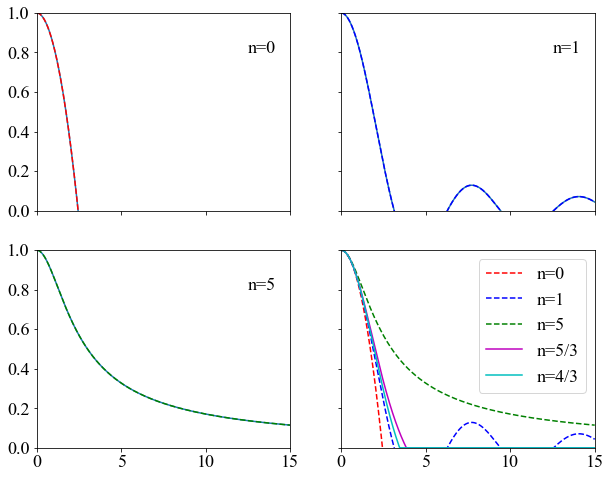

In [32]:
fig,axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey = True, figsize=(10,8))

ax = axs[0,0]
ax.plot(epsilon, 1.-epsilon**2/6.)
ax.plot(epsilon, answer[:,0], 'r--')
ax.set_xlim(0, 15)
ax.set_ylim(0,1)
ax.text(12.5, 0.8, "n=0")

ax = axs[0,1]
ax.plot(epsilon, np.sin(epsilon)/epsilon)
ax.plot(epsilon, answer2[:,0], 'b--')
ax.set_xlim(0, 15)
ax.set_ylim(0,1)
ax.text(12.5, 0.8, "n=1")

ax = axs[1,0]
ax.plot(epsilon, (1.+epsilon**2/3.)**(-1./2.))
ax.plot(epsilon, answer3[:,0], 'g--')
ax.set_xlim(0, 15)
ax.set_ylim(0,1)
ax.text(12.5, 0.8, "n=5")

ax = axs[1,1]
ax.plot(epsilon, answer[:,0], 'r--', label='n=0')
ax.plot(epsilon, answer2[:,0], 'b--', label='n=1')
ax.plot(epsilon, answer3[:,0], 'g--', label='n=5')
ax.plot(epsilon, answer4[:,0], 'm', label='n=5/3')
ax.plot(epsilon, answer5[:,0], 'c', label='n=4/3')
ax.set_ylim(0,1)
ax.legend()

As n increases, the density falls off less steeply. Not sure what that oscilatory behavior is at n=1

Problem 1c

In [34]:
theta = answer4[:,0]
min_theta = (np.abs(theta)).argmin() 
epsilon_new = epsilon[min_theta]



M = 4.0*np.pi*np.trapz((theta*epsilon**2)[0:min_theta], epsilon[0:min_theta])

print(epsilon_new)
print(M)

3.858858858933133
58.43868350002606


Problem 3b (had to look at solutions because of time)

In [35]:
G = c.G.cgs.value
k = c.k_B.cgs.value
mu = c.m_p.cgs.value

yr = u.yr.to(u.s)
day = u.day.to(u.s)
hour = u.hour.to(u.s)

Rp = 6.4e8 #cm
Mp = 6e27 #g
T = 1e3 #K



cs = np.sqrt(k*T/mu)
H = Rp**2*cs**2/G/Mp


In [37]:
r = np.linspace(Rp, 5.0*Rp, 200)

rho0 = 1e-11  # g/cm^3
rho_hydrostat = rho0*np.exp((Rp/H)*(Rp/r-1.0))  # from previous problem set

rs = G*Mp/(2.*cs**2)

# equation from problem 3a
def f_v(v, r, cs, rs):
    return( v*np.exp(-v**2/(2*cs**2)) - cs*(r/rs)**(-2.)*np.exp(3./2.-2.*rs/r) )

# guesses
vguess = np.zeros(200)
vguess[r > rs] = 2.0*cs

v_final = fsolve(f_v, vguess, args=(r,cs,rs,))

Mdot = 4.*np.pi*Rp**2*rho0*v_final[0] 

rho_final = Mdot/(4.*np.pi*r**2*v_final)

Text(0, 0.5, 'Velocity (cs)')

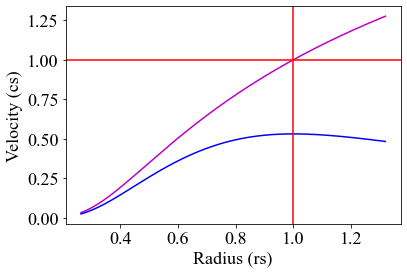

In [43]:
def velocity_derivs(v, r, cs, Mp, G):
    rs = G*Mp/(2.*cs**2)
    if r == rs:
        dv_dr = 2.0*cs**3/G/Mp
    else:
        dv_dr = v*(2.*cs**2/r - G*Mp/r**2)/(v**2-cs**2)
    return dv_dr

v_base = 0.025*cs 
v_breeze = odeint(velocity_derivs, v_base, r, args=(cs,Mp,G,))
v_breeze = v_breeze[:,0]

Mdot = 4.*np.pi*Rp**2*rho0*v_breeze[0]
rho_breeze = Mdot/(4.*np.pi*r**2*v_breeze)

plt.plot(r/rs, v_final/cs, 'm')
plt.plot(r/rs, v_breeze/cs, 'b')
plt.axvline(1, color='red')
plt.axhline(1, color='red')
plt.xlabel('Radius (rs)')
plt.ylabel('Velocity (cs)')

solution 1 passes through the sonic point, solution 2 is always less than cs

Text(0, 0.5, 'Density (g cm$^{-3}$)')

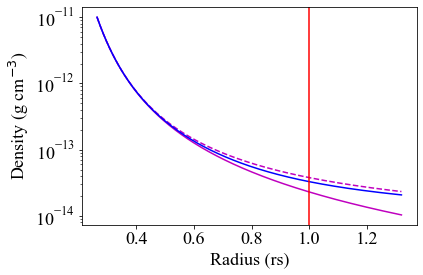

In [45]:
plt.semilogy(r/rs, rho_hydrostat, 'm--')
plt.semilogy(r/rs, rho_final, 'm')
plt.semilogy(r/rs, rho_breeze, 'b')
plt.axvline(1, color='red')
plt.xlabel('Radius (rs)')
plt.ylabel('Density (g cm$^{-3}$)')

Problem 4